# My Sports Feeds

In [228]:
import numpy as np
import pandas as pd
from ohmysportsfeedspy import MySportsFeeds
from pandas.io.json import json_normalize

from sklearn.cluster import k_means
from sklearn.cluster import KMeans


%matplotlib inline

In [5]:
msf = MySportsFeeds(version="1.0")
msf.authenticate("RobMulla", "o%f^vgL01ISy")

In [20]:
output = msf.msf_get_data(league='nba',
                          season='2016-2017-regular',
                          feed='player_gamelogs',
                          format='csv',
                          player='stephen-curry')

In [61]:
nfl = msf.msf_get_data(league='nfl',
                       season='2015-2016-regular',
                       feed='cumulative_player_stats',
                       format='json')

In [63]:
df = json_normalize(nfl['cumulativeplayerstats']['playerstatsentry'])

In [87]:
df2 = df.loc[df.fillna('9999.9')['stats.Fg1_19Pct.#text'].apply(float) < 9999]

In [255]:
df2.sort_values('stats.XpPct.#text').head()

,player.FirstName,player.ID,player.JerseyNumber,player.LastName,player.Position,stats.Fg1_19Pct.#text,stats.Fg1_19Pct.@abbreviation,stats.Fg1_19Pct.@category,stats.Fg20_29Pct.#text,stats.Fg20_29Pct.@abbreviation,...,stats.XpMade.#text,stats.XpMade.@abbreviation,stats.XpMade.@category,stats.XpPct.#text,stats.XpPct.@abbreviation,stats.XpPct.@category,team.Abbreviation,team.City,team.ID,team.Name
7,Corey,8459,25,Acosta,K,0.0,1-19%,Field Goals,0.0,20-29%,...,0,Made,PAT,0.0,Xp%,PAT,SF,San Francisco,78,49ers
756,Garrett,9042,8,Hartley,K,0.0,1-19%,Field Goals,0.0,20-29%,...,0,Made,PAT,0.0,Xp%,PAT,CLE,Cleveland,58,Browns
626,Jordan,6290,4,Gay,K,0.0,1-19%,Field Goals,0.0,20-29%,...,0,Made,PAT,0.0,Xp%,PAT,BUF,Buffalo,48,Bills
411,Billy,8857,8,Cundiff,K,0.0,1-19%,Field Goals,0.0,20-29%,...,0,Made,PAT,0.0,Xp%,PAT,BUF,Buffalo,48,Bills
575,Nick,7911,2,Folk,K,0.0,1-19%,Field Goals,100.0,20-29%,...,19,Made,PAT,100.0,Xp%,PAT,NYJ,New York,51,Jets


# Wide Recievers

In [96]:
wr = df.loc[(df['player.Position'] == 'WR')]

In [ ]:
wr['stats.Rec20Plus.@abbreviation']

In [111]:
wr20plus = wr[['player.LastName','stats.Rec20Plus.#text']]

In [127]:
wr20plus['20plus_receptions'] = pd.to_numeric(wr20plus['20plus_receptions'])

/home/robmulla/miniconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [132]:
wr.head()

,player.FirstName,player.ID,player.JerseyNumber,player.LastName,player.Position,stats.Fg1_19Pct.#text,stats.Fg1_19Pct.@abbreviation,stats.Fg1_19Pct.@category,stats.Fg20_29Pct.#text,stats.Fg20_29Pct.@abbreviation,...,stats.XpMade.#text,stats.XpMade.@abbreviation,stats.XpMade.@category,stats.XpPct.#text,stats.XpPct.@abbreviation,stats.XpPct.@category,team.Abbreviation,team.City,team.ID,team.Name
0,Jared,6923,84,Abbrederis,WR,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,GB,Green Bay,62,Packers
8,Davante,6924,17,Adams,WR,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,GB,Green Bay,62,Packers
16,Nelson,8019,17,Agholor,WR,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,PHI,Philadelphia,54,Eagles
19,Kamar,6125,11,Aiken,WR,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,BAL,Baltimore,56,Ravens
22,Seyi,8020,16,Ajirotutu,WR,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,PHI,Philadelphia,54,Eagles


In [136]:
wr20plus.head()

,player.LastName,stats.Rec20Plus.#text,20plus_receptions
0,Abbrederis,1,1
8,Adams,6,6
16,Agholor,3,3
19,Aiken,9,9
22,Ajirotutu,0,0


In [137]:
wr20plus.sort_values('20plus_receptions', inplace=True)

/home/robmulla/miniconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [143]:
wr20plus_greaterthan10 = wr20plus.loc[wr20plus['20plus_receptions'] > 10]

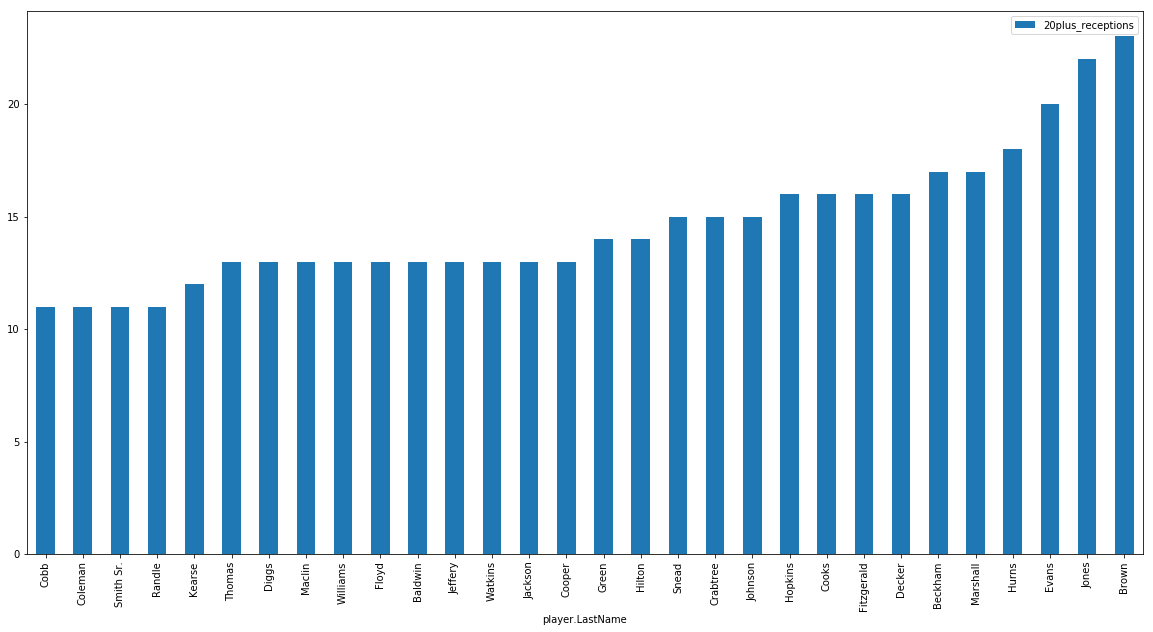

In [144]:
wr20plus_greaterthan10.plot(x='player.LastName',figsize=(20,10), kind='bar')

In [160]:
rec_cols = []
for col in wr.columns:
    if col[:9] == 'stats.Rec' and col[-5:] == '#text':
        print(col)
        rec_cols.append(col)

stats.Rec20Plus.#text
stats.Rec40Plus.#text
stats.RecAverage.#text
stats.RecFumbles.#text
stats.RecLng.#text
stats.RecTD.#text
stats.RecYards.#text
stats.Receptions.#text


In [161]:
rec_cols

['stats.Rec20Plus.#text',
 'stats.Rec40Plus.#text',
 'stats.RecAverage.#text',
 'stats.RecFumbles.#text',
 'stats.RecLng.#text',
 'stats.RecTD.#text',
 'stats.RecYards.#text',
 'stats.Receptions.#text']

In [171]:
wr_stats = wr[['player.FirstName','player.LastName','player.Position']+rec_cols].copy()

In [172]:
for col in rec_cols:
    wr_stats[col[:-5]] = pd.to_numeric(wr_stats[col])

In [182]:
wr_stats_atleast500 = wr_stats.loc[wr_stats['stats.RecYards.'] > 500]

In [186]:
wr_stats_atleast500.head()

,player.FirstName,player.LastName,player.Position,stats.Rec20Plus.#text,stats.Rec40Plus.#text,stats.RecAverage.#text,stats.RecFumbles.#text,stats.RecLng.#text,stats.RecTD.#text,stats.RecYards.#text,stats.Receptions.#text,stats.Rec20Plus.,stats.Rec40Plus.,stats.RecAverage.,stats.RecFumbles.,stats.RecLng.,stats.RecTD.,stats.RecYards.,stats.Receptions.
19,Kamar,Aiken,WR,9,2,12.6,0,48,5,944,75,9,2,12.6,0,48,5,944,75
38,Keenan,Allen,WR,8,0,10.8,0,38,4,725,67,8,0,10.8,0,38,4,725,67
45,Danny,Amendola,WR,5,1,10.0,0,41,3,648,65,5,1,10.0,0,41,3,648,65
92,Doug,Baldwin,WR,13,3,13.7,0,80,14,1069,78,13,3,13.7,0,80,14,1069,78
123,Cole,Beasley,WR,7,0,10.3,0,30,5,537,52,7,0,10.3,0,30,5,537,52


In [189]:
wr_stats_atleast500['player.FirstLast'] = wr_stats_atleast500['player.FirstName'] + ' ' + wr_stats_atleast500['player.LastName']

/home/robmulla/miniconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [190]:
wr_stats_atleast500

,player.FirstName,player.LastName,player.Position,stats.Rec20Plus.#text,stats.Rec40Plus.#text,stats.RecAverage.#text,stats.RecFumbles.#text,stats.RecLng.#text,stats.RecTD.#text,stats.RecYards.#text,stats.Receptions.#text,stats.Rec20Plus.,stats.Rec40Plus.,stats.RecAverage.,stats.RecFumbles.,stats.RecLng.,stats.RecTD.,stats.RecYards.,stats.Receptions.,player.FirstLast
19,Kamar,Aiken,WR,9,2,12.6,0,48,5,944,75,9,2,12.6,0,48,5,944,75,Kamar Aiken
38,Keenan,Allen,WR,8,0,10.8,0,38,4,725,67,8,0,10.8,0,38,4,725,67,Keenan Allen
45,Danny,Amendola,WR,5,1,10.0,0,41,3,648,65,5,1,10.0,0,41,3,648,65,Danny Amendola
92,Doug,Baldwin,WR,13,3,13.7,0,80,14,1069,78,13,3,13.7,0,80,14,1069,78,Doug Baldwin
123,Cole,Beasley,WR,7,0,10.3,0,30,5,537,52,7,0,10.3,0,30,5,537,52,Cole Beasley
126,Odell,Beckham,WR,17,8,15.1,0,87,13,1450,96,17,8,15.1,0,87,13,1450,96,Odell Beckham
135,Travis,Benjamin,WR,10,6,14.3,0,61,5,973,68,10,6,14.3,0,61,5,973,68,Travis Benjamin
169,Anquan,Boldin,WR,9,1,11.4,0,51,4,789,69,9,1,11.4,0,51,4,789,69,Anquan Boldin
215,Kenny,Britt,WR,10,5,18.9,0,60,3,681,36,10,5,18.9,0,60,3,681,36,Kenny Britt
226,Antonio,Brown,WR,23,8,13.6,0,59,10,1843,136,23,8,13.6,0,59,10,1843,136,Antonio Brown


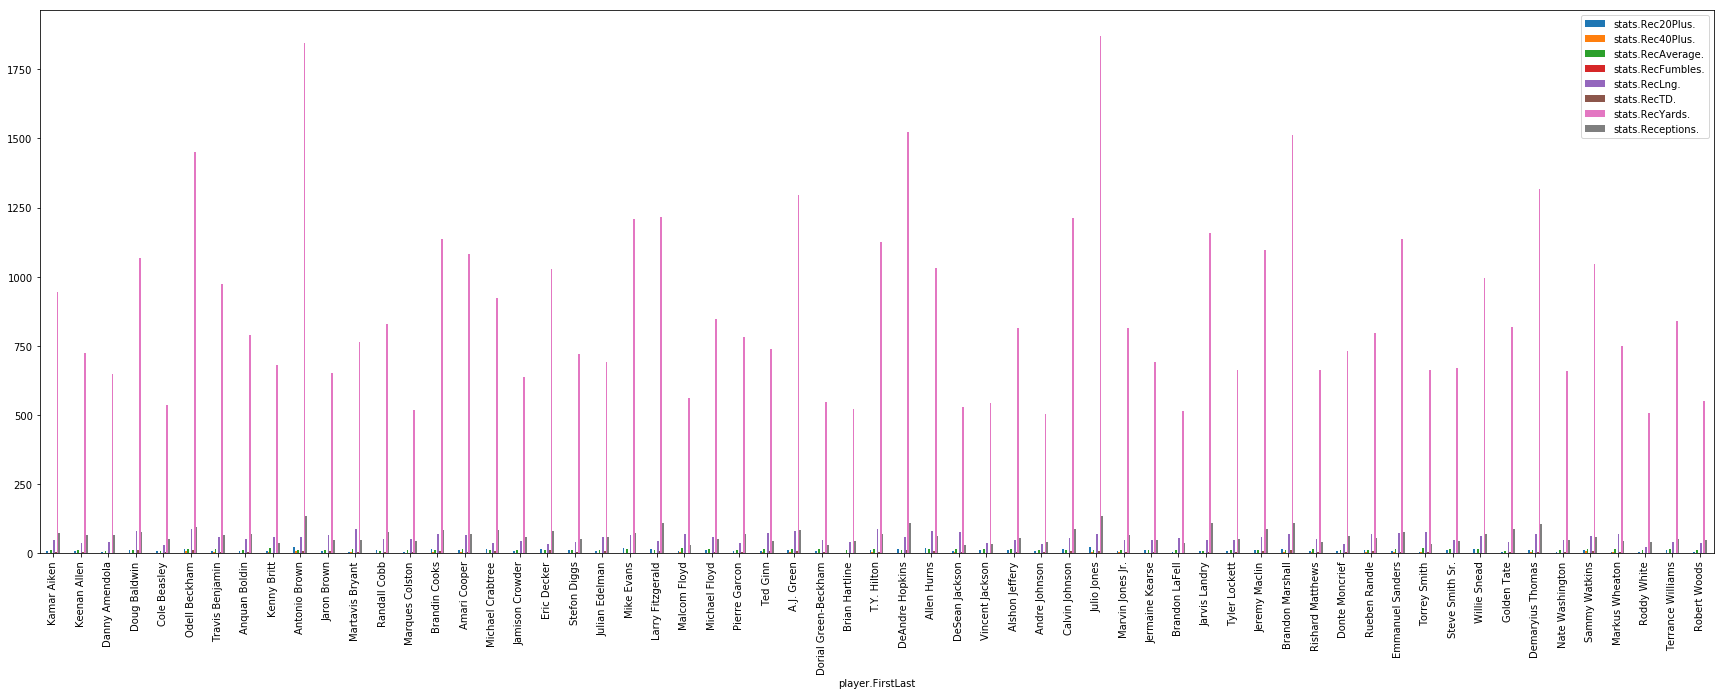

In [191]:
wr_stats_atleast500.plot(x='player.FirstLast', figsize=(30,10), kind='bar')

## Cluster Analysis of WRs

In [201]:
wr_stats_atleast500['stats.Rec20Plus.'].dtype

dtype('int64')

In [221]:
wr_stats_atleast500_nums = wr_stats_atleast500.select_dtypes([np.number])

In [229]:
km = KMeans(n_clusters=5)

In [231]:
km.fit(wr_stats_atleast500_nums)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [248]:
wr_stats_atleast500['cluser'] = km.labels_

/home/robmulla/miniconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [256]:
wr_stats_atleast500.sort_values(['cluser']).head()

,player.FirstName,player.LastName,player.Position,stats.Rec20Plus.#text,stats.Rec40Plus.#text,stats.RecAverage.#text,stats.RecFumbles.#text,stats.RecLng.#text,stats.RecTD.#text,stats.RecYards.#text,...,stats.Rec20Plus.,stats.Rec40Plus.,stats.RecAverage.,stats.RecFumbles.,stats.RecLng.,stats.RecTD.,stats.RecYards.,stats.Receptions.,player.FirstLast,cluser
1968,Robert,Woods,WR,6,0,11.7,0,37,3,552,...,6,0,11.7,0,37,3,552,47,Robert Woods,0
861,DeSean,Jackson,WR,8,4,17.6,0,77,4,528,...,8,4,17.6,0,77,4,528,30,DeSean Jackson,0
872,Vincent,Jackson,WR,13,0,16.4,0,36,3,543,...,13,0,16.4,0,36,3,543,33,Vincent Jackson,0
569,Malcom,Floyd,WR,8,4,18.7,0,70,3,561,...,8,4,18.7,0,70,3,561,30,Malcom Floyd,0
909,Andre,Johnson,WR,7,0,12.3,0,35,4,503,...,7,0,12.3,0,35,4,503,41,Andre Johnson,0


In [249]:
import seaborn as sns

In [267]:
wr_stats_atleast500.sort_values('stats.Receptions.',
                                ascending=False).head()

,player.FirstName,player.LastName,player.Position,stats.Rec20Plus.#text,stats.Rec40Plus.#text,stats.RecAverage.#text,stats.RecFumbles.#text,stats.RecLng.#text,stats.RecTD.#text,stats.RecYards.#text,...,stats.Rec20Plus.,stats.Rec40Plus.,stats.RecAverage.,stats.RecFumbles.,stats.RecLng.,stats.RecTD.,stats.RecYards.,stats.Receptions.,player.FirstLast,cluser
960,Julio,Jones,WR,22,5,13.8,0,70,8,1871,...,22,5,13.8,0,70,8,1871,136,Julio Jones,2
226,Antonio,Brown,WR,23,8,13.6,0,59,10,1843,...,23,8,13.6,0,59,10,1843,136,Antonio Brown,2
812,DeAndre,Hopkins,WR,16,3,13.7,0,61,11,1522,...,16,3,13.7,0,61,11,1522,111,DeAndre Hopkins,3
1029,Jarvis,Landry,WR,8,3,10.5,0,50,4,1157,...,8,3,10.5,0,50,4,1157,110,Jarvis Landry,1
1126,Brandon,Marshall,WR,17,5,13.9,0,69,14,1513,...,17,5,13.9,0,69,14,1513,109,Brandon Marshall,3


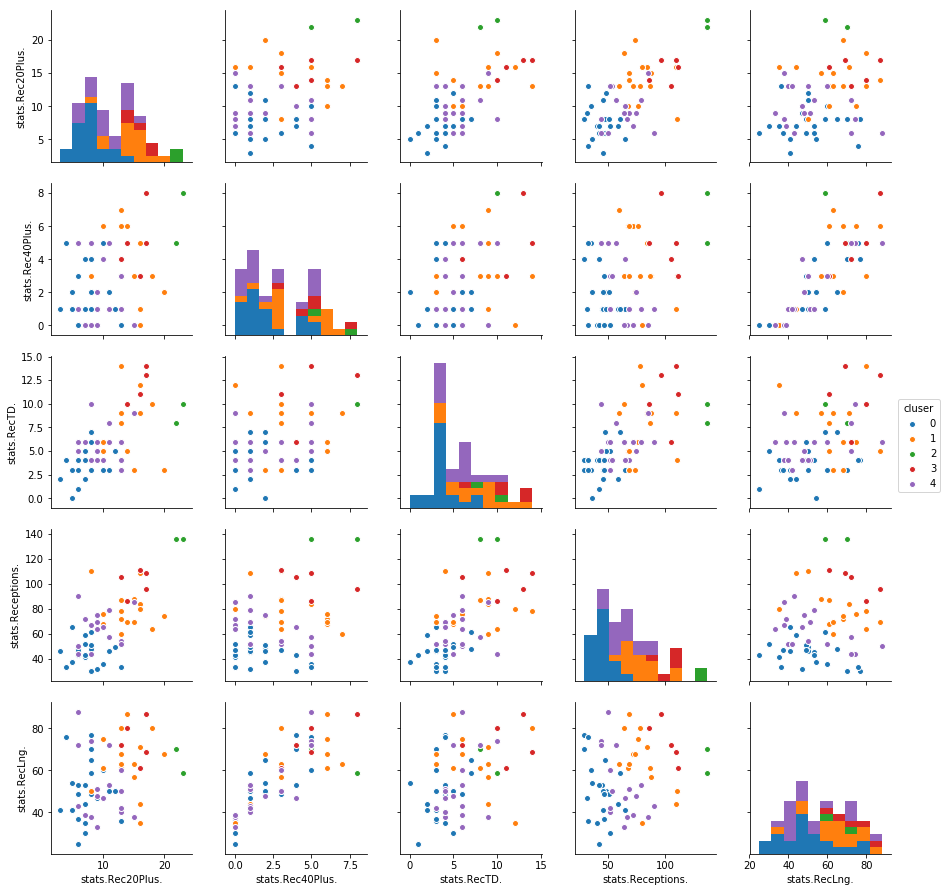

In [268]:
sns.pairplot(wr_stats_atleast500, hue='cluser', vars=['stats.Rec20Plus.',
                                                      'stats.Rec40Plus.',
                                                      'stats.RecTD.',
                                                      'stats.Receptions.',
                                                      'stats.RecLng.'])

# Cluster Analysis of WRs Different Season

stats.Rec20Plus.#text
stats.Rec40Plus.#text
stats.RecAverage.#text
stats.RecFumbles.#text
stats.RecLng.#text

/home/robmulla/miniconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/robmulla/miniconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



stats.RecTD.#text
stats.RecYards.#text
stats.Receptions.#text


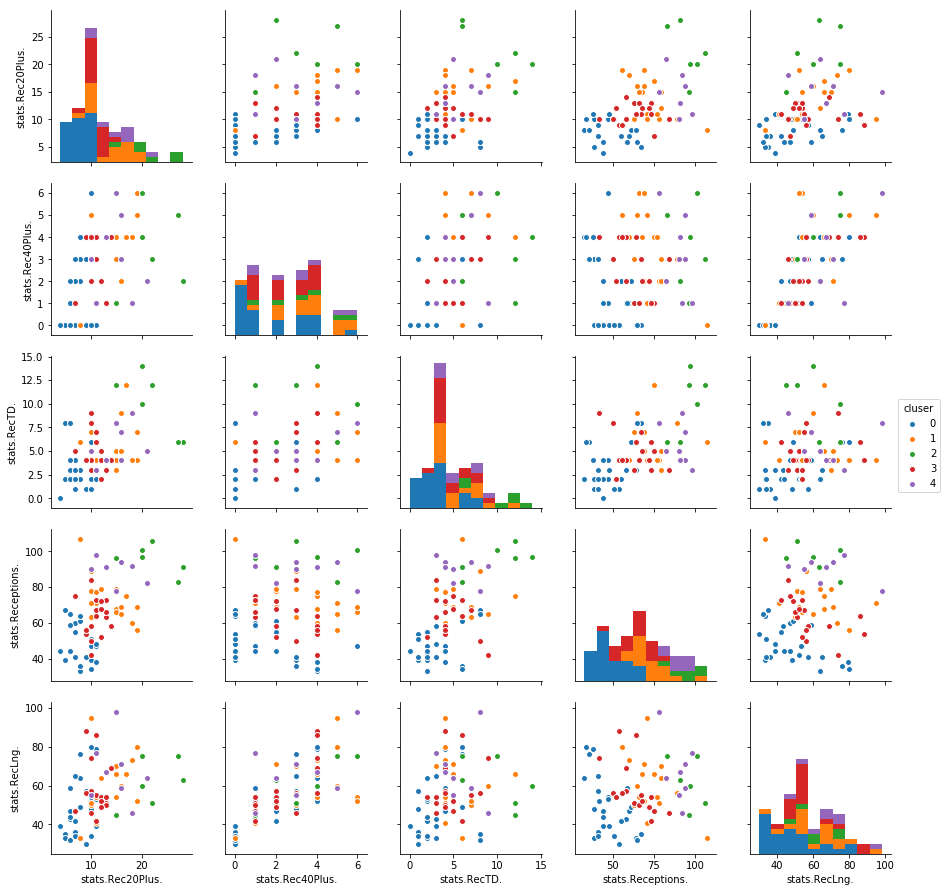

In [270]:
nfl = msf.msf_get_data(league='nfl',
                       season='2016-2017-regular',
                       feed='cumulative_player_stats',
                       format='json')

df = json_normalize(nfl['cumulativeplayerstats']['playerstatsentry'])
df2 = df.loc[df.fillna('9999.9')['stats.Fg1_19Pct.#text'].apply(float) < 9999]
wr = df.loc[(df['player.Position'] == 'WR')]

rec_cols = []
for col in wr.columns:
    if col[:9] == 'stats.Rec' and col[-5:] == '#text':
        print(col)
        rec_cols.append(col)
        
wr_stats = wr[['player.FirstName','player.LastName','player.Position']+rec_cols].copy()
for col in rec_cols:
    wr_stats[col[:-5]] = pd.to_numeric(wr_stats[col])
    
wr_stats_atleast500 = wr_stats.loc[wr_stats['stats.RecYards.'] > 500]

wr_stats_atleast500['player.FirstLast'] = wr_stats_atleast500['player.FirstName'] + ' ' + wr_stats_atleast500['player.LastName']

wr_stats_atleast500_nums = wr_stats_atleast500.select_dtypes([np.number])


km = KMeans(n_clusters=5)
km.fit(wr_stats_atleast500_nums)

wr_stats_atleast500['cluser'] = km.labels_

sns.pairplot(wr_stats_atleast500, hue='cluser', vars=['stats.Rec20Plus.',
                                                      'stats.Rec40Plus.',
                                                      'stats.RecTD.',
                                                      'stats.Receptions.',
                                                      'stats.RecLng.'])

In [271]:
wr_stats_atleast500.sort_values('stats.Receptions.',
                                ascending=False).head()

,player.FirstName,player.LastName,player.Position,stats.Rec20Plus.#text,stats.Rec40Plus.#text,stats.RecAverage.#text,stats.RecFumbles.#text,stats.RecLng.#text,stats.RecTD.#text,stats.RecYards.#text,...,stats.Rec20Plus.,stats.Rec40Plus.,stats.RecAverage.,stats.RecFumbles.,stats.RecLng.,stats.RecTD.,stats.RecYards.,stats.Receptions.,player.FirstLast,cluser
534,Larry,Fitzgerald,WR,8,0,9.6,0,33,6,1025,...,8,0,9.6,0,33,6,1025,107,Larry Fitzgerald,1
210,Antonio,Brown,WR,22,3,12.1,0,51,12,1284,...,22,3,12.1,0,51,12,1284,106,Antonio Brown,2
117,Odell,Beckham,WR,20,6,13.5,0,75,10,1367,...,20,6,13.5,0,75,10,1367,101,Odell Beckham,2
487,Julian,Edelman,WR,11,1,11.3,0,77,3,1106,...,11,1,11.3,0,77,3,1106,98,Julian Edelman,4
1248,Jordy,Nelson,WR,20,4,13.0,0,60,14,1257,...,20,4,13.0,0,60,14,1257,97,Jordy Nelson,2


In [273]:
wr_stats_atleast500.loc[wr_stats_atleast500['cluser'] == 1]

,player.FirstName,player.LastName,player.Position,stats.Rec20Plus.#text,stats.Rec40Plus.#text,stats.RecAverage.#text,stats.RecFumbles.#text,stats.RecLng.#text,stats.RecTD.#text,stats.RecYards.#text,...,stats.Rec20Plus.,stats.Rec40Plus.,stats.RecAverage.,stats.RecFumbles.,stats.RecLng.,stats.RecTD.,stats.RecYards.,stats.Receptions.,player.FirstLast,cluser
8,Davante,Adams,WR,17,4,13.6,0,66,12,1017,...,17,4,13.6,0,66,12,1017,75,Davante Adams,1
126,Kelvin,Benjamin,WR,10,3,14.9,0,50,7,941,...,10,3,14.9,0,50,7,941,63,Kelvin Benjamin,1
200,Kenny,Britt,WR,15,4,14.9,0,66,5,1012,...,15,4,14.9,0,66,5,1012,68,Kenny Britt,1
376,Michael,Crabtree,WR,10,3,11.4,0,56,8,1014,...,10,3,11.4,0,56,8,1014,89,Michael Crabtree,1
534,Larry,Fitzgerald,WR,8,0,9.6,0,33,6,1025,...,8,0,9.6,0,33,6,1025,107,Larry Fitzgerald,1
589,Pierre,Garcon,WR,15,3,13.2,0,70,3,1041,...,15,3,13.2,0,70,3,1041,79,Pierre Garcon,1
649,A.J.,Green,WR,15,6,14.7,0,54,4,968,...,15,6,14.7,0,54,4,968,66,A.J. Green,1
773,DeAndre,Hopkins,WR,10,2,12.2,0,51,4,954,...,10,2,12.2,0,51,4,954,78,DeAndre Hopkins,1
832,DeSean,Jackson,WR,19,5,18.0,0,80,4,1005,...,19,5,18.0,0,80,4,1005,56,DeSean Jackson,1
922,Marvin,Jones Jr.,WR,18,4,17.0,0,73,4,1023,...,18,4,17.0,0,73,4,1023,60,Marvin Jones Jr.,1
